## Text Vectorization (count-based methods) Exercise

##### Author: Alex Sherman | alsherman@deloitte.com

In [3]:
from IPython.core.display import display, HTML
from IPython.display import Image
from gensim.summarization.bm25 import get_bm25_weights
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

In order to address this, scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:

- **tokenizing** strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.

- **counting** the occurrences of tokens in each document.

- **normalizing** and weighting with diminishing importance tokens that occur in the majority of samples / documents.

Sources: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

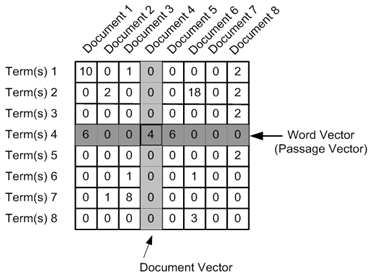

In [2]:
# Document and Word Vectors
Image("../../raw_data/images/word_vector.png", width=400, height=400)

In [20]:
# create a list of documents
text = ['This is the first document'
        , 'This is the second second document'
        , 'And the third one'
        , 'Is it the first document again']

### Step 1 - import from sklearn

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

### Step 2 - instantiate

In [17]:
# create an instance of countvectorizer
vect = CountVectorizer()

In [18]:
# when we print vect, we see its hyperparameters
print(vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


### Step 3 - fit 

In [19]:
# The vectorizer learns the vocabulary when we fit it with our documents. 
# This means it learns the distinct tokens (terms) in the text of the documents. 
# We can observe these with the method get_feature_names

vect.fit(text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [20]:
print('ORIGINAL_SENTENCES: \n {} \n'.format(text))
print('FEATURE_NAMES: \n {}'.format(vect.get_feature_names()))

ORIGINAL_SENTENCES: 
 ['This is the first document', 'This is the second second document', 'And the third one', 'Is it the first document again'] 

FEATURE_NAMES: 
 ['again', 'and', 'document', 'first', 'is', 'it', 'one', 'second', 'the', 'third', 'this']


### Step 4 - transform 

In [21]:
# Transform creates a sparse matrix, identifying the indices where terms are stores in each document
# This sparse matrix has 4 rows and 11 columns

vect.transform(text)

<4x11 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

### Sparsity

As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have many feature values that are zeros (typically more than 99% of them).

For instance a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

In [22]:
print(vect.transform(text))

  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 8)	1
  (0, 10)	1
  (1, 2)	1
  (1, 4)	1
  (1, 7)	2
  (1, 8)	1
  (1, 10)	1
  (2, 1)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1
  (3, 0)	1
  (3, 2)	1
  (3, 3)	1
  (3, 4)	1
  (3, 5)	1
  (3, 8)	1


In [9]:
sparse_matrix_url = 'https://op2.github.io/PyOP2/_images/csr.svg'
iframe = '<iframe src={} width=1000 height=200></iframe>'.format(sparse_matrix_url)
HTML(iframe)

In [23]:
# This is easier to understand when we covert the sparse matrix into a dense matrix or pandas DataFrame
vect.transform(text).toarray()

array([[0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0]], dtype=int64)

In [12]:
import pandas as pd

# store the dense matrix
data = vect.transform(text).toarray()

# store the learned vocabulary
columns = vect.get_feature_names()

# combine the data and columns into a dataframe
pd.DataFrame(data, columns=columns)

,again,and,document,first,is,it,one,second,the,third,this
0,1,0,1,0,0,0,0,0,0,0,0


### Bag of Words

We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or “Bag of n-grams” representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

A corpus of documents can thus be represented by a **matrix with one row per document and one column per token (e.g. word)** occurring in the corpus.

## Exercise

Use the trained CountVectorizer to vectorize the following sentences. Create a dataframe with the dense results.

In [18]:
example_text = ['again we observe a document'
               , 'the second time we have see this text']

In [19]:
# TODO


,again,and,document,first,is,it,one,second,the,third,this
0,1,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,1


### fit_transform

- we can combine the training and transformation into a single method. This is a common process in the sklearn api, as we often want to learn something from a training data set and apply the results to testing or production data

In [23]:
vect = CountVectorizer()
vect.fit_transform(text)

<2x11 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [32]:
pipeline_url = 'http://karlrosaen.com/ml/learning-log/2016-06-20/pipeline-diagram.png'
iframe = '<iframe src={} width=800 height=550></iframe>'.format(pipeline_url)
HTML(iframe)

## Customize the Transformer

During the process of vectorizing the text, we can apply numerous transformations to modify the text and resulting vectors. 

### lowercase
- boolean, True by default
- Convert all characters to lowercase before tokenizing.

In [25]:
# by instantiating CountVectorizer with differnt parameters, we can change the vocabulary
# lowercase determines if all words should be lowercase, setting it to False includes uppercase words

vect = CountVectorizer(lowercase=False)
vect.fit(text)
print(vect.get_feature_names())

['And', 'Is', 'This', 'again', 'document', 'first', 'is', 'it', 'one', 'second', 'the', 'third']


### stop_words

- string {‘english’}, list, or None (default)
 - If None, no stop words will be used. 
 - If ‘english’, a built-in stop word list for English is used.
 - If list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
- max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words 


In [26]:
# stops words determine if we should include common words (e.g. and, is, the) which show up in most documents
vect = CountVectorizer(stop_words='english')
vect.fit(text)
print(vect.get_feature_names())

['document', 'second']


In [44]:
# stops words determine if we should include common words (e.g. and, is, the) which show up in most documents
vect = CountVectorizer(stop_words=['first','second','third'])
vect.fit(text)
print(vect.get_feature_names())

['again', 'and', 'document', 'is', 'it', 'one', 'the', 'this']


### vocabulary

- Mapping or iterable, optional
- Either a Mapping (e.g., a dict) where keys are terms and values are indices in the feature matrix, or an iterable over terms. If not given, a vocabulary is determined from the input documents. 

In [46]:
# stops words determine if we should include common words (e.g. and, is, the) which show up in most documents
vect = CountVectorizer(vocabulary=['first','second','third'])
vect.fit(text)
print(vect.get_feature_names())

['first', 'second', 'third']


### max_features
- int or None, default=None
- If not None, build a vocabulary that only consider the top  max_features ordered by term frequency across the corpus.

In [77]:
vect = CountVectorizer(max_features=5)
vect.fit(text)
print(vect.get_feature_names())

['document', 'first', 'is', 'second', 'the']


### max_df
- float in range [0.0, 1.0] or int, default=1.0
- When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [78]:
vect = CountVectorizer(max_df=.5)
vect.fit(text)
print(vect.get_feature_names())

['again', 'and', 'first', 'it', 'one', 'second', 'third', 'this']


### min_df

- float in range [0.0, 1.0] or int, default=1
- When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [80]:
vect = CountVectorizer(min_df=.5)
vect.fit(text)
print(vect.get_feature_names())

['document', 'first', 'is', 'the', 'this']


### ngram_range

- tuple (min_n, max_n)

- The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [36]:
# max features determines the maximum number of features to display
vect = CountVectorizer(ngram_range=(2,2), max_features=5)
vect.fit(text)
print(vect.get_feature_names())

['and the', 'first document', 'is the', 'the first', 'this is']


### binary

- boolean, default=False
- If True, all non zero counts are set to 1. This is useful for discrete probabilistic models that model binary events rather than integer counts.

In [55]:
# max features determines the maximum number of features to display
vect = CountVectorizer(binary=True)
vect.fit_transform(['Two Two different words words']).toarray()

array([[1, 1]], dtype=int64)

### analyzer

- String, {‘word’, ‘char’, ‘char_wb’} or callable
- Specifies whether to use n_grams of words or characters
- Character n_grams are useful in certain content, such as genomics with DNA sequences (e.g. GCTATCAFF...)

In [41]:
# max features determines the maximum number of features to display
vect = CountVectorizer(analyzer='char', ngram_range=(2,2))
vect.fit(text)
print(vect.get_feature_names())

[' a', ' d', ' f', ' i', ' o', ' s', ' t', 'ag', 'ai', 'an', 'co', 'cu', 'd ', 'do', 'e ', 'ec', 'en', 'fi', 'ga', 'he', 'hi', 'in', 'ir', 'is', 'it', 'me', 'nd', 'ne', 'nt', 'oc', 'on', 'rd', 'rs', 's ', 'se', 'st', 't ', 'th', 'um']


### Limitations of the Bag of Words representation

A collection of unigrams (what bag of words is) cannot capture phrases and multi-word expressions, effectively disregarding any word order dependence. Additionally, the bag of words model doesn’t account for potential misspellings or word derivations.

N-grams to the rescue! Instead of building a simple collection of unigrams (n=1), one might prefer a collection of bigrams (n=2), where occurrences of pairs of consecutive words are counted.

One might alternatively consider a collection of character n-grams, a representation resilient against misspellings and derivations.

For example, let’s say we’re dealing with a corpus of two documents: ['words', 'wprds']. The second document contains a misspelling of the word ‘words’. A simple bag of words representation would consider these two as very distinct documents, differing in both of the two possible features. A character 2-gram representation, however, would find the documents matching in 4 out of 8 features, which may help the preferred classifier decide better:

# Attributes

In scikit-learn attributes are often provided to store information of the instance of the transformer or model. 

Many attributes are only available after the model is fit. For instance the learned vocabulary does not exist in Countvectorizer until text data has been provided with the fit method. Until the data is provided these attributes do not exist. The notation for these learned attributes is a trailing underscore after the attribute name (e.g. vocabulary_). 

In [84]:
vect = CountVectorizer(max_features=5)
vect.fit(text)
print(vect.get_feature_names())

['document', 'first', 'is', 'second', 'the']


### vocabulary_

- dict
- A mapping of terms to feature indices.

In [72]:
vect.vocabulary_

{'document': 0, 'first': 1, 'is': 2, 'second': 3, 'the': 4}

### stop\__words_\_ 
- set
- Terms that were ignored because they either:
 - occurred in too many documents (max_df)
 - occurred in too few documents (min_df)
 - were cut off by feature selection (max_features)

In [73]:
vect.stop_words_

{'again', 'and', 'it', 'one', 'third', 'this'}

### Term-Frequency Problems

"The **main problem with the term-frequency approach is that it scales up frequent terms and scales down rare terms which are empirically more informative than the high frequency terms.**
The basic intuition is that a term that occurs frequently in many documents is not a good discriminator; the important question here is: why would you, in a classification problem for instance, emphasize a term which is almost present in the entire corpus of your documents ?

The tf-idf weight comes to solve this problem. **What tf-idf gives is how important is a word to a document**
in a collection, and that’s why tf-idf incorporates local and global parameters, because it takes in consideration not only the isolated term but also the term within the document collection. **What tf-idf then does to solve that problem, is to scale down the frequent terms while scaling up the rare terms; a term that occurs 10 times more than another isn’t 10 times more important than it, that’s why tf-idf uses the logarithmic scale to do that."**

Source: http://blog.christianperone.com/2011/10/machine-learning-text-feature-extraction-tf-idf-part-ii/

### TFIDF

In a large text corpus, some words will be very present (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.
Tf means term-frequency while tf–idf means term-frequency times inverse document-frequency: 

- tf-idf(t,d) = tf(t,d) * idf(t)

In [52]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
text

['This is the first document',
 'This is the second second document',
 'And the third one',
 'Is it the first document again']

In [54]:
tfidf_vect = TfidfVectorizer()
pd.DataFrame(tfidf_vect.fit_transform(text).toarray(), columns=columns)

,again,and,document,first,is,it,one,second,the,third,this
0,0.000000,0.000000,0.418127,0.516470,0.418127,0.000000,0.000000,0.000000,0.341846,0.000000,0.516470
1,0.000000,0.000000,0.267144,0.000000,0.267144,0.000000,0.000000,0.837067,0.218408,0.000000,0.329977
2,0.000000,0.552805,0.000000,0.000000,0.000000,0.000000,0.552805,0.000000,0.288477,0.552805,0.000000
3,0.519263,0.000000,0.331439,0.409393,0.331439,0.519263,0.000000,0.000000,0.270973,0.000000,0.000000


### TFIDF Analysis
As we look at the tfidf score (which have a range of 0-1), high score occur for words that show up frequently in specific sentence but infrequenty overall. Low score occur in words that show up frequenty across all documents.

- **'Second' has a high score** as it shows up twice in document two and not in any other documents
- **'The' has a low score** as it show up in all documents

## TFIDF Calculation

#### term frequency (tf)

How often does each term exist in each document. 

Term frequency is the numerator; thus, the tfidf score for a term increases in documents where it is frequent.

In [55]:
vect = CountVectorizer()
tf = vect.fit_transform(text).toarray()
print(tf)

[[0 0 1 1 1 0 0 0 1 0 1]
 [0 0 1 0 1 0 0 2 1 0 1]
 [0 1 0 0 0 0 1 0 1 1 0]
 [1 0 1 1 1 1 0 0 1 0 0]]


#### inverse document frequency (idf)

Calculation: log(\# document in the corpus / # documents where the term appears)

- Numerator: **The # of documents in the corpus has no effect** as it is the same for all terms
- Denominator: **As the # of documents in which the term appears increases, the idf decreases**; thus terms that show up in many different documents (e.g. stop words) recieve low tfidf scores as they are not important terms to define the meaning of the document 
- As a sub-linear function, we take the **log because the relevance does not increase proportionally with the term frequency**. As an example if a term shows up in 1M docs or in 2M docs, the effect is not the same as if it has shown up in 1 doc or 2 docs times respectively. In other words there is a relative threshold.

In [27]:
logarithm_url = 'http://www.science4all.org/wp-content/uploads/2013/10/Graph-of-Logarithm-and-Exponential1.png'
iframe = '<iframe src={} width=500 height=350></iframe>'.format(logarithm_url)
HTML(iframe)

In [1]:
# idf calculation
print( np.log(len(tf) / tf.sum(axis=0)) )

NameError: name 'np' is not defined

In [57]:
# when we use sum(axis=0) we take the sum of each column
# as opposed to a scalar sum (single # result) of all values
tf.sum(axis=0)

array([1, 1, 3, 2, 3, 1, 1, 2, 4, 1, 2], dtype=int64)

#### scikit-learn calculation modifications

scikit-learn further modifies the caluclation for adding one to the numerator, denominator, and log to avoid divide by zero errors

In [58]:
idf = np.log( (len(tf)+1) / (tf.sum(axis=0)+1) ) + 1
print(idf)

[ 1.91629073  1.91629073  1.22314355  1.51082562  1.22314355  1.91629073
  1.91629073  1.51082562  1.          1.91629073  1.51082562]


In [59]:
# value as stored from sklearn in tfidf_vect
print(tfidf_vect.idf_)

[ 1.91629073  1.91629073  1.22314355  1.51082562  1.22314355  1.91629073
  1.91629073  1.91629073  1.          1.91629073  1.51082562]


#### term frequency * inverse document frequency (tf*idf)

In [60]:
tfidf = pd.DataFrame(tf*idf)
tfidf

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.000000,1.223144,1.510826,1.223144,0.000000,0.000000,0.000000,1.0,0.000000,1.510826
1,0.000000,0.000000,1.223144,0.000000,1.223144,0.000000,0.000000,3.021651,1.0,0.000000,1.510826
2,0.000000,1.916291,0.000000,0.000000,0.000000,0.000000,1.916291,0.000000,1.0,1.916291,0.000000
3,1.916291,0.000000,1.223144,1.510826,1.223144,1.916291,0.000000,0.000000,1.0,0.000000,0.000000


#### term vector normalization

The use of the simple tfidf does not account for the length of the document. Additionally it provides opportunities for spammers to repeat the term many times to make it seem more important in a specific document (e.g. to improve google search ranking)

To solve these issues, we normalize each vector. By default TfidfVectorizer uses an 'l2' normalization.

In [65]:
# tf*idf is equivalent to using TfidfVectorizer without a norm
tfidf_vect = TfidfVectorizer(norm=None)
pd.DataFrame(tfidf_vect.fit_transform(text).toarray())

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.000000,1.223144,1.510826,1.223144,0.000000,0.000000,0.000000,1.0,0.000000,1.510826
1,0.000000,0.000000,1.223144,0.000000,1.223144,0.000000,0.000000,3.832581,1.0,0.000000,1.510826
2,0.000000,1.916291,0.000000,0.000000,0.000000,0.000000,1.916291,0.000000,1.0,1.916291,0.000000
3,1.916291,0.000000,1.223144,1.510826,1.223144,1.916291,0.000000,0.000000,1.0,0.000000,0.000000


In [63]:
from sklearn.preprocessing import normalize
pd.DataFrame(normalize(tfidf, norm='l2'))

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.000000,0.418127,0.516470,0.418127,0.000000,0.000000,0.00000,0.341846,0.000000,0.51647
1,0.000000,0.000000,0.311634,0.000000,0.311634,0.000000,0.000000,0.76986,0.254781,0.000000,0.38493
2,0.000000,0.552805,0.000000,0.000000,0.000000,0.000000,0.552805,0.00000,0.288477,0.552805,0.00000
3,0.519263,0.000000,0.331439,0.409393,0.331439,0.519263,0.000000,0.00000,0.270973,0.000000,0.00000


In [2]:
sqlalchemy_url = 'http://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(sqlalchemy_url)
HTML(iframe)

### BM25

BM25 is often a better algorithm than tfidf to determine term importance as it takes that document length into account.

In [4]:
url = 'http://opensourceconnections.com/blog/2015/10/16/bm25-the-next-generation-of-lucene-relevation/'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(url)
HTML(iframe)

### Co-occurrence matrix

"Similar words tend to occur together and will have similar context for example 

**Co-occurrence** – For a given corpus, the co-occurrence of a pair of words say w1 and w2 is the number of times they have appeared together in a Context Window.

**Context Window** – Context window is specified by a number and the direction.

Let’s say there are V unique words in the corpus. So Vocabulary size = V. The columns of the Co-occurrence matrix form the context words. The different variations of Co-Occurrence Matrix are-

A co-occurrence matrix of size V X V. Now, for even a decent corpus V gets very large and difficult to handle. So generally, this architecture is never preferred in practice.
A co-occurrence matrix of size V X N where N is a subset of V and can be obtained by removing irrelevant words like stopwords etc. for example. This is still very large and presents computational difficulties.

SOURCE: https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/

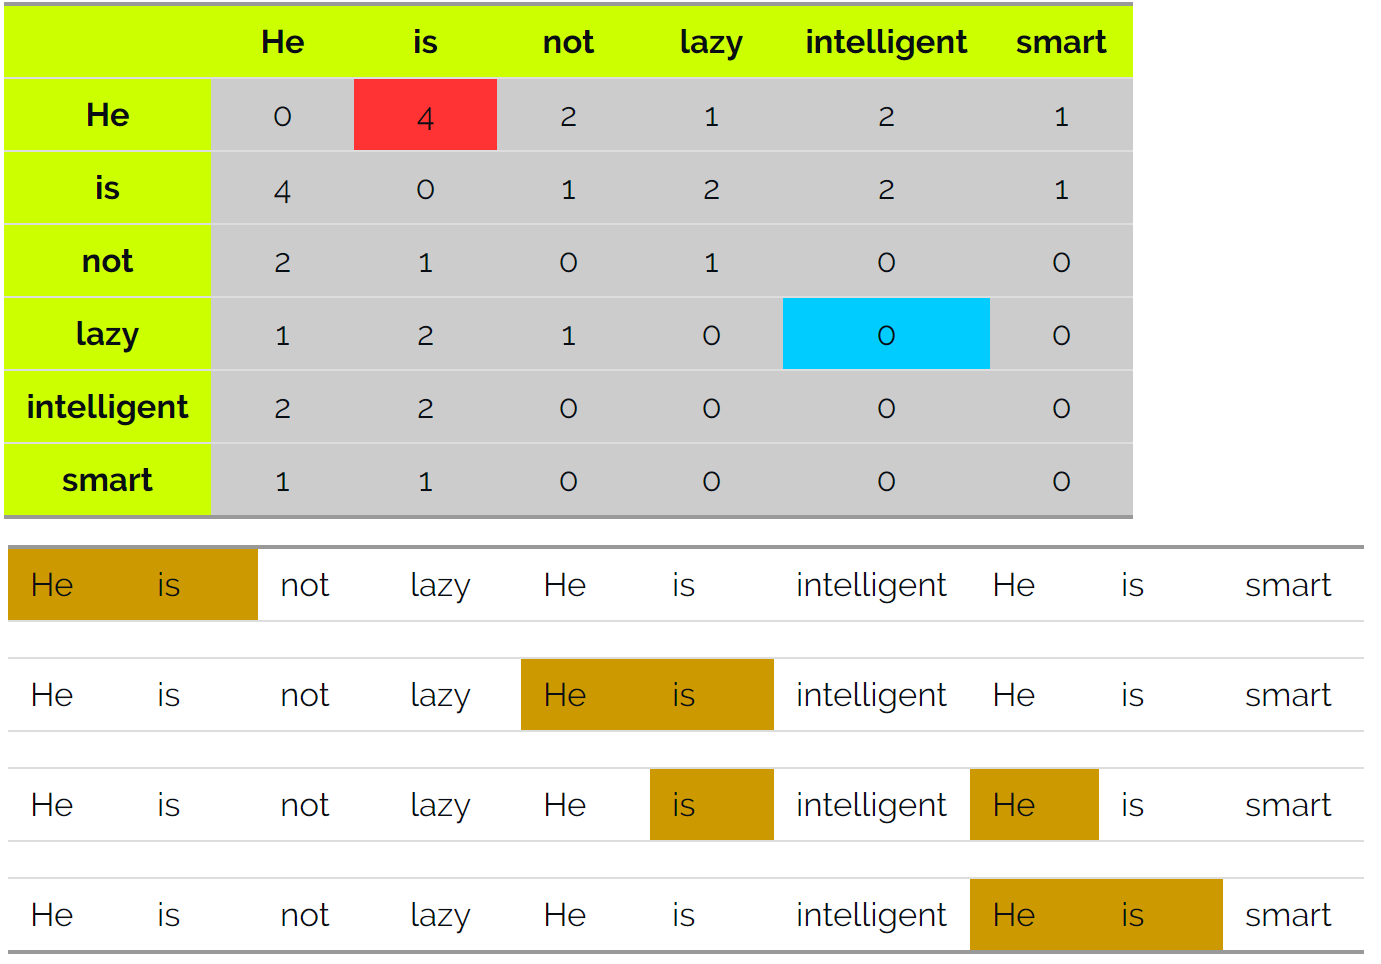

In [5]:
# Co-occurance matrix
Image("../../raw_data/images/cooccurance_matrix.png", width=400, height=400)

In [6]:
# review text
text

NameError: name 'text' is not defined

In [7]:
vect = CountVectorizer(ngram_range=(1,1))
X = vect.fit_transform(text)
cooccurance = (X.T * X) # this is co-occurrence matrix in sparse csr format
cooccurance.setdiag(0) # fill same word cooccurence to 0

NameError: name 'text' is not defined

In [8]:
import seaborn as sns
%matplotlib inline

terms = vect.get_feature_names()
cooccur_df = pd.DataFrame(cooccurance.todense(), columns=terms, index=terms)
sns.heatmap(cooccur_df)

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.